In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier




import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

# Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [2]:
df = acquire.get_titanic_data()
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [3]:
# df.info()

In [4]:
train, validate, test = prepare.prep_titanic_data(df)


In [5]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(train[['age']])
train[['age']] = imputer.transform(train[['age']])
validate[['age']] = imputer.transform(validate[['age']])
test[['age']] = imputer.transform(test[['age']])


## This would be where you explore your data

    - adam has an excellent little exploration of 'no age' in his decicion tree exercise review

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             498 non-null    int64  
 1   survived                 498 non-null    int64  
 2   pclass                   498 non-null    int64  
 3   sex                      498 non-null    object 
 4   age                      498 non-null    float64
 5   sibsp                    498 non-null    int64  
 6   parch                    498 non-null    int64  
 7   fare                     498 non-null    float64
 8   embark_town              498 non-null    object 
 9   alone                    498 non-null    int64  
 10  baseline_prediction      498 non-null    int64  
 11  sex_male                 498 non-null    uint8  
 12  embark_town_Queenstown   498 non-null    uint8  
 13  embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(7),

In [7]:
train.shape, validate.shape, test.shape

((498, 14), (214, 14), (179, 14))

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

        - the most prevalent class in your TRAINING dataset

In [8]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

- the biggest value in the target variable is 0 (in other words, did not survive)

In [9]:
# df['baseline_prediction'] = 0
# df

In [10]:
from sklearn.metrics import classification_report

In [11]:
print(classification_report(train.survived,train.baseline_prediction))

# see the baseline accuracy in its classification report

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       307
           1       0.00      0.00      0.00       191

    accuracy                           0.62       498
   macro avg       0.31      0.50      0.38       498
weighted avg       0.38      0.62      0.47       498



- Baseline accuracy is 62%

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             498 non-null    int64  
 1   survived                 498 non-null    int64  
 2   pclass                   498 non-null    int64  
 3   sex                      498 non-null    object 
 4   age                      498 non-null    float64
 5   sibsp                    498 non-null    int64  
 6   parch                    498 non-null    int64  
 7   fare                     498 non-null    float64
 8   embark_town              498 non-null    object 
 9   alone                    498 non-null    int64  
 10  baseline_prediction      498 non-null    int64  
 11  sex_male                 498 non-null    uint8  
 12  embark_town_Queenstown   498 non-null    uint8  
 13  embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(7),

In [13]:
# the string features were causing problems with the DecisionTreeClassifier
X_train = train.drop(columns=['survived', 'sex','passenger_id', 'embark_town'])
y_train = train.survived

X_validate = validate.drop(columns=['survived', 'sex','passenger_id','embark_town'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [14]:
X_train.shape

(498, 10)

In [15]:
X_validate.isnull().sum()

pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
alone                      0
baseline_prediction        0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [16]:
# below, we the clf.fit function is telling me there are NaNs somewhere.  This show me 97 in 'age'
X_train.isnull().sum()

# i addressed this by imputing average ages two cells below

pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
alone                      0
baseline_prediction        0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [17]:
# Create the Decision Tree object with desired hyper-parameters.
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
# clf = 'classifier'

In [18]:
# Fit the model (i.e. apply the algorithm to your unique set of data so that the algorithm can identify a pattern)
# model.fit(X, y)

clf = clf.fit(X_train, y_train)

In [19]:
import graphviz
from graphviz import Graph

# there was initially an argument in here that was raising an error, something to do with X_train.classes_
# we tood it out and things got better

dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

In [20]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [21]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.65048544, 0.34951456],
       [0.65048544, 0.34951456],
       [0.65048544, 0.34951456],
       [0.03225806, 0.96774194],
       [0.03225806, 0.96774194]])

In [22]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


In [23]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[277,  30],
       [ 57, 134]])

In [24]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [25]:
labels = sorted(y_train.unique())
print('Actual on the left, predicted on the top; 0 = perished, 1 = survived')
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

Actual on the left, predicted on the top; 0 = perished, 1 = survived


,0,1
0,277,30
1,57,134


In [26]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [27]:
# isn't this what we did with the classification report? Yes, according to adam

# True Positive rate = recall; false positive rate = precision

### 5. Run through steps 2-4 using a different max_depth value.

In [28]:
clf = DecisionTreeClassifier(max_depth=4, random_state=123)
clf = clf.fit(X_train, y_train)
dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

In [29]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [30]:
# This is Adam's 'for' loop
for i in range(2, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.829341    0.817073  0.825301    0.823207      0.824636
recall       0.902280    0.701571  0.825301    0.801925      0.825301
f1-score     0.864275    0.754930  0.825301    0.809602      0.822337
support    307.000000  191.000000  0.825301  498.000000    498.000000

Tree with max depth of 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.831858    0.842767  0.835341    0.837313      0.836042
recall       0.918567    0.701571  0.835341    0.810069      0.835341
f1-score     

### 6. Which model performs better on your in-sample data?

    - the max_depth 4 works about the same
    - checking adam's code, 15+ max depth provides highest accuracy
    - but we know that they are overfit somehow

### Below is what I produced before the exercise review

In [31]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.60674157, 0.39325843],
       [0.60674157, 0.39325843],
       [0.92857143, 0.07142857],
       [0.07142857, 0.92857143],
       [0.        , 1.        ]])

In [32]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.84


In [33]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[282,  25],
       [ 57, 134]])

In [34]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [35]:
labels = sorted(y_train.unique())
print('Actual on the left, predicted on the top; 0 = perished, 1 = survived')
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

Actual on the left, predicted on the top; 0 = perished, 1 = survived


,0,1
0,282,25
1,57,134


In [36]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       307
           1       0.84      0.70      0.77       191

    accuracy                           0.84       498
   macro avg       0.84      0.81      0.82       498
weighted avg       0.84      0.84      0.83       498



### 7. Which model performs best on your out-of-sample data, the validate set?

In [37]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf = clf.fit(X_validate, y_validate)
dot_data = export_graphviz(clf, feature_names= X_validate.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

In [38]:
# make prediction on train obeservations

y_pred = clf.predict(X_validate)
y_pred[0:5]

array([0, 0, 0, 1, 0])

In [39]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.86956522, 0.13043478],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.07894737, 0.92105263],
       [0.07894737, 0.92105263]])

In [40]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.83


In [41]:
# confusion matrix

confusion_matrix(y_validate, y_pred)

array([[127,   5],
       [ 31,  51]])

In [42]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [43]:
labels = sorted(y_train.unique())
print('Actual on the left, predicted on the top; 0 = perished, 1 = survived')
pd.DataFrame(confusion_matrix(y_validate, y_pred), index=labels, columns=labels)

Actual on the left, predicted on the top; 0 = perished, 1 = survived


,0,1
0,127,5
1,31,51


In [44]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88       132
           1       0.91      0.62      0.74        82

    accuracy                           0.83       214
   macro avg       0.86      0.79      0.81       214
weighted avg       0.84      0.83      0.82       214



### CLASSIFICATION REPORT FOR MAX_DEPTH = 3

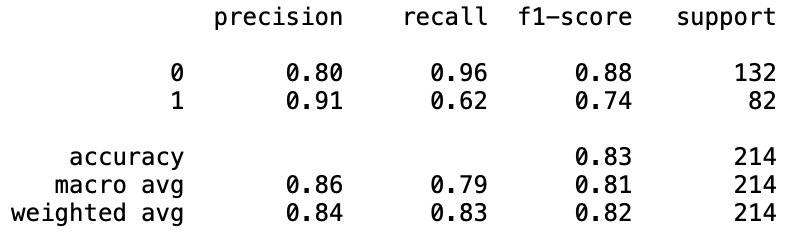

 ### CLASSIFICATION REPORT FOR MAX_DEPTH = 4
 
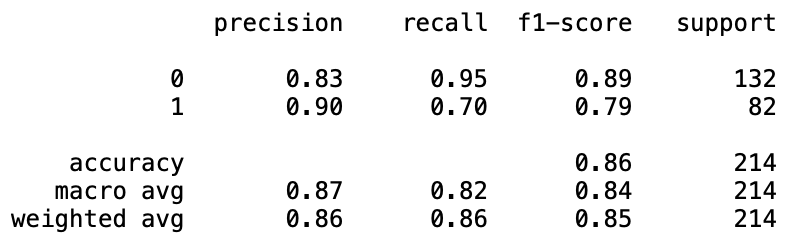

### CLASSIFICATION REPORT FOR MAX_DEPTH = 5

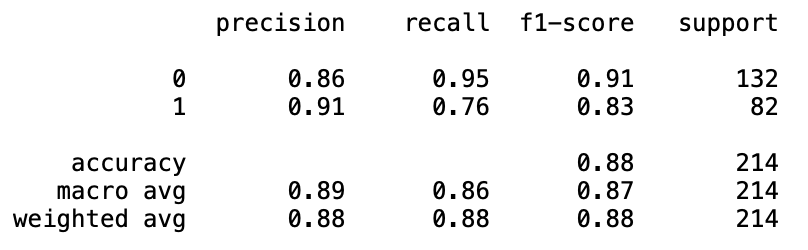

In [45]:
#adam's code for a nice, clean view:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.799197,0.761682,0.037515
1,3,0.825301,0.799065,0.026236
2,4,0.835341,0.794393,0.040949
3,5,0.853414,0.803738,0.049675
4,6,0.865462,0.789720,0.075742
5,7,0.885542,0.775701,0.109841
6,8,0.897590,0.785047,0.112544
7,9,0.921687,0.808411,0.113276
8,10,0.933735,0.785047,0.148688
9,11,0.959839,0.794393,0.165447


In [46]:
# here, we're comparing differences between the train and validate data sets
# we're tossing any differences above a certain amount (.10) and ordering by difference as a tie-breaker
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

# the best max_depth, following these criteria, is 5

,max_depth,train_accuracy,validate_accuracy,difference
3,5,0.853414,0.803738,0.049675
1,3,0.825301,0.799065,0.026236
2,4,0.835341,0.794393,0.040949
4,6,0.865462,0.789720,0.075742
0,2,0.799197,0.761682,0.037515


# 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.


### baseline accuracy?

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier(max_depth = 10, )
rf

RandomForestClassifier(max_depth=10)

In [49]:
rf = rf.fit(X_train, y_train)
rf

RandomForestClassifier(max_depth=10)

In [50]:
print(rf.feature_importances_)

[0.08870637 0.21669815 0.05202426 0.03176636 0.23331031 0.01854436
 0.         0.32173883 0.01325851 0.02395286]


In [51]:
y_pred = rf.predict(X_train)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[7.65177842e-01, 2.34822158e-01],
       [3.24196970e-01, 6.75803030e-01],
       [9.45750000e-01, 5.42500000e-02],
       [1.00000000e-02, 9.90000000e-01],
       [0.00000000e+00, 1.00000000e+00],
       [8.76538185e-01, 1.23461815e-01],
       [8.96646825e-01, 1.03353175e-01],
       [9.45822247e-01, 5.41777534e-02],
       [9.55048297e-01, 4.49517029e-02],
       [9.75892857e-01, 2.41071429e-02],
       [7.60531454e-01, 2.39468546e-01],
       [9.27774468e-01, 7.22255318e-02],
       [4.42481203e-02, 9.55751880e-01],
       [7.50094272e-01, 2.49905728e-01],
       [8.89950861e-01, 1.10049139e-01],
       [6.45950088e-01, 3.54049912e-01],
       [9.48222458e-01, 5.17775420e-02],
       [4.70674002e-02, 9.52932600e-01],
       [6.96101024e-01, 3.03898976e-01],
       [7.63867000e-01, 2.36133000e-01],
       [1.63010290e-01, 8.36989710e-01],
       [9.61928562e-01, 3.80714378e-02],
       [7.77777778e-03, 9.92222222e-01],
       [0.00000000e+00, 1.00000000e+00],
       [6.418125

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [53]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.97


In [54]:
conf_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred))

conf_matrix
# confusion matrix - actual on left, predicted on top

# 0 = 'perished', 1= 'survived'

,0,1
0,307,0
1,16,175


In [55]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       307
           1       1.00      0.92      0.96       191

    accuracy                           0.97       498
   macro avg       0.98      0.96      0.97       498
weighted avg       0.97      0.97      0.97       498



### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [56]:
TP = 307
FP = 16
FN = 0
TN = 175
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.9678714859437751
True Positive Rate: 1.0
False Positive Rate: 0.08376963350785341
True Negative Rate: 0.9162303664921466
False Negative Rate: 0.0
Precision: 0.9504643962848297
Recall: 1.0
F1 Score: 0.9746031746031747
Support (0): 307
Support (1): 191


### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [57]:
for i in range(20,1, -1):
    for n in range(1, 21):
        # Make the model
        forest = RandomForestClassifier(max_depth=i, min_samples_leaf=n)#, random_state=123)

        #why isn't the random_state argument working?

        # Fit the model (on train and only train)
        forest.fit(X_train, y_train)

        # Use the model
        # We'll evaluate the model's performance on train, first
        y_predictions = forest.predict(X_train)

        # Produce the classification report on the actual y values and this model's predicted y values
        report = classification_report(y_train, y_predictions) #, output_dict=True)
        print(f"Forest with max depth of {i} and sample leaves {n}")
        print(report)
        print()

Forest with max depth of 20 and sample leaves 1
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       307
           1       0.99      0.99      0.99       191

    accuracy                           0.99       498
   macro avg       0.99      0.99      0.99       498
weighted avg       0.99      0.99      0.99       498


Forest with max depth of 20 and sample leaves 2
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       307
           1       0.96      0.84      0.90       191

    accuracy                           0.93       498
   macro avg       0.93      0.91      0.92       498
weighted avg       0.93      0.93      0.92       498


Forest with max depth of 20 and sample leaves 3
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       307
           1       0.93      0.81      0.86       191

    accuracy                        

Forest with max depth of 19 and sample leaves 3
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       307
           1       0.94      0.80      0.86       191

    accuracy                           0.90       498
   macro avg       0.91      0.88      0.89       498
weighted avg       0.91      0.90      0.90       498


Forest with max depth of 19 and sample leaves 4
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       307
           1       0.94      0.75      0.83       191

    accuracy                           0.89       498
   macro avg       0.90      0.86      0.87       498
weighted avg       0.89      0.89      0.88       498


Forest with max depth of 19 and sample leaves 5
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       307
           1       0.93      0.75      0.83       191

    accuracy                        

Forest with max depth of 18 and sample leaves 5
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       307
           1       0.92      0.75      0.83       191

    accuracy                           0.88       498
   macro avg       0.89      0.85      0.87       498
weighted avg       0.88      0.88      0.88       498


Forest with max depth of 18 and sample leaves 6
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       307
           1       0.93      0.74      0.83       191

    accuracy                           0.88       498
   macro avg       0.89      0.85      0.87       498
weighted avg       0.88      0.88      0.88       498


Forest with max depth of 18 and sample leaves 7
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       307
           1       0.93      0.71      0.80       191

    accuracy                        

Forest with max depth of 17 and sample leaves 7
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       307
           1       0.90      0.73      0.81       191

    accuracy                           0.87       498
   macro avg       0.88      0.84      0.85       498
weighted avg       0.87      0.87      0.86       498


Forest with max depth of 17 and sample leaves 8
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       307
           1       0.91      0.71      0.80       191

    accuracy                           0.86       498
   macro avg       0.87      0.83      0.85       498
weighted avg       0.87      0.86      0.86       498


Forest with max depth of 17 and sample leaves 9
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       307
           1       0.89      0.70      0.78       191

    accuracy                        

Forest with max depth of 16 and sample leaves 10
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       307
           1       0.90      0.70      0.79       191

    accuracy                           0.86       498
   macro avg       0.87      0.83      0.84       498
weighted avg       0.86      0.86      0.85       498


Forest with max depth of 16 and sample leaves 11
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       307
           1       0.88      0.67      0.76       191

    accuracy                           0.84       498
   macro avg       0.85      0.81      0.82       498
weighted avg       0.85      0.84      0.83       498


Forest with max depth of 16 and sample leaves 12
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       307
           1       0.91      0.64      0.75       191

    accuracy                     

Forest with max depth of 15 and sample leaves 12
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       307
           1       0.88      0.68      0.77       191

    accuracy                           0.84       498
   macro avg       0.85      0.81      0.82       498
weighted avg       0.85      0.84      0.84       498


Forest with max depth of 15 and sample leaves 13
              precision    recall  f1-score   support

           0       0.83      0.94      0.89       307
           1       0.89      0.70      0.78       191

    accuracy                           0.85       498
   macro avg       0.86      0.82      0.83       498
weighted avg       0.85      0.85      0.85       498


Forest with max depth of 15 and sample leaves 14
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       307
           1       0.88      0.66      0.76       191

    accuracy                     

Forest with max depth of 14 and sample leaves 14
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       307
           1       0.87      0.66      0.75       191

    accuracy                           0.83       498
   macro avg       0.84      0.80      0.81       498
weighted avg       0.84      0.83      0.83       498


Forest with max depth of 14 and sample leaves 15
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       307
           1       0.89      0.64      0.75       191

    accuracy                           0.83       498
   macro avg       0.85      0.80      0.81       498
weighted avg       0.84      0.83      0.83       498


Forest with max depth of 14 and sample leaves 16
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       307
           1       0.89      0.66      0.76       191

    accuracy                     

Forest with max depth of 13 and sample leaves 16
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       307
           1       0.89      0.64      0.74       191

    accuracy                           0.83       498
   macro avg       0.85      0.79      0.81       498
weighted avg       0.84      0.83      0.82       498


Forest with max depth of 13 and sample leaves 17
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       307
           1       0.88      0.68      0.77       191

    accuracy                           0.84       498
   macro avg       0.85      0.81      0.82       498
weighted avg       0.85      0.84      0.84       498


Forest with max depth of 13 and sample leaves 18
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       307
           1       0.86      0.66      0.75       191

    accuracy                     

Forest with max depth of 12 and sample leaves 18
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       307
           1       0.87      0.64      0.74       191

    accuracy                           0.83       498
   macro avg       0.84      0.79      0.80       498
weighted avg       0.83      0.83      0.82       498


Forest with max depth of 12 and sample leaves 19
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       307
           1       0.86      0.66      0.75       191

    accuracy                           0.83       498
   macro avg       0.84      0.80      0.81       498
weighted avg       0.84      0.83      0.83       498


Forest with max depth of 12 and sample leaves 20
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       307
           1       0.87      0.65      0.75       191

    accuracy                     

Forest with max depth of 11 and sample leaves 20
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       307
           1       0.88      0.64      0.74       191

    accuracy                           0.83       498
   macro avg       0.84      0.79      0.81       498
weighted avg       0.83      0.83      0.82       498


Forest with max depth of 10 and sample leaves 1
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       307
           1       1.00      0.92      0.96       191

    accuracy                           0.97       498
   macro avg       0.98      0.96      0.97       498
weighted avg       0.97      0.97      0.97       498


Forest with max depth of 10 and sample leaves 2
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       307
           1       0.95      0.83      0.89       191

    accuracy                       

Forest with max depth of 9 and sample leaves 2
              precision    recall  f1-score   support

           0       0.90      0.98      0.93       307
           1       0.96      0.82      0.88       191

    accuracy                           0.92       498
   macro avg       0.93      0.90      0.91       498
weighted avg       0.92      0.92      0.91       498


Forest with max depth of 9 and sample leaves 3
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       307
           1       0.93      0.81      0.87       191

    accuracy                           0.91       498
   macro avg       0.91      0.89      0.90       498
weighted avg       0.91      0.91      0.90       498


Forest with max depth of 9 and sample leaves 4
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       307
           1       0.94      0.77      0.85       191

    accuracy                           

Forest with max depth of 8 and sample leaves 4
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       307
           1       0.94      0.77      0.85       191

    accuracy                           0.89       498
   macro avg       0.91      0.87      0.88       498
weighted avg       0.90      0.89      0.89       498


Forest with max depth of 8 and sample leaves 5
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       307
           1       0.92      0.74      0.82       191

    accuracy                           0.88       498
   macro avg       0.89      0.85      0.86       498
weighted avg       0.88      0.88      0.87       498


Forest with max depth of 8 and sample leaves 6
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       307
           1       0.92      0.72      0.81       191

    accuracy                           

Forest with max depth of 7 and sample leaves 6
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       307
           1       0.92      0.72      0.81       191

    accuracy                           0.87       498
   macro avg       0.88      0.84      0.86       498
weighted avg       0.88      0.87      0.87       498


Forest with max depth of 7 and sample leaves 7
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       307
           1       0.91      0.71      0.80       191

    accuracy                           0.86       498
   macro avg       0.87      0.83      0.85       498
weighted avg       0.87      0.86      0.86       498


Forest with max depth of 7 and sample leaves 8
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       307
           1       0.91      0.72      0.80       191

    accuracy                           

Forest with max depth of 6 and sample leaves 8
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       307
           1       0.91      0.70      0.79       191

    accuracy                           0.86       498
   macro avg       0.87      0.83      0.84       498
weighted avg       0.86      0.86      0.85       498


Forest with max depth of 6 and sample leaves 9
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       307
           1       0.88      0.67      0.76       191

    accuracy                           0.84       498
   macro avg       0.85      0.81      0.82       498
weighted avg       0.85      0.84      0.83       498


Forest with max depth of 6 and sample leaves 10
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       307
           1       0.91      0.65      0.76       191

    accuracy                          

Forest with max depth of 5 and sample leaves 11
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       307
           1       0.87      0.65      0.74       191

    accuracy                           0.83       498
   macro avg       0.84      0.80      0.81       498
weighted avg       0.84      0.83      0.82       498


Forest with max depth of 5 and sample leaves 12
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       307
           1       0.90      0.67      0.77       191

    accuracy                           0.84       498
   macro avg       0.86      0.81      0.82       498
weighted avg       0.85      0.84      0.84       498


Forest with max depth of 5 and sample leaves 13
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       307
           1       0.90      0.69      0.78       191

    accuracy                        

Forest with max depth of 4 and sample leaves 13
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       307
           1       0.88      0.67      0.76       191

    accuracy                           0.84       498
   macro avg       0.85      0.81      0.82       498
weighted avg       0.85      0.84      0.83       498


Forest with max depth of 4 and sample leaves 14
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       307
           1       0.86      0.69      0.76       191

    accuracy                           0.84       498
   macro avg       0.84      0.81      0.82       498
weighted avg       0.84      0.84      0.83       498


Forest with max depth of 4 and sample leaves 15
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       307
           1       0.85      0.64      0.73       191

    accuracy                        

Forest with max depth of 3 and sample leaves 15
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       307
           1       0.87      0.64      0.74       191

    accuracy                           0.83       498
   macro avg       0.84      0.79      0.80       498
weighted avg       0.83      0.83      0.82       498


Forest with max depth of 3 and sample leaves 16
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       307
           1       0.90      0.64      0.75       191

    accuracy                           0.83       498
   macro avg       0.85      0.80      0.81       498
weighted avg       0.84      0.83      0.83       498


Forest with max depth of 3 and sample leaves 17
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       307
           1       0.87      0.64      0.74       191

    accuracy                        

Forest with max depth of 2 and sample leaves 17
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       307
           1       0.83      0.63      0.72       191

    accuracy                           0.81       498
   macro avg       0.81      0.78      0.79       498
weighted avg       0.81      0.81      0.80       498


Forest with max depth of 2 and sample leaves 18
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       307
           1       0.80      0.65      0.72       191

    accuracy                           0.81       498
   macro avg       0.80      0.78      0.79       498
weighted avg       0.80      0.81      0.80       498


Forest with max depth of 2 and sample leaves 19
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       307
           1       0.81      0.57      0.67       191

    accuracy                        

- see about altering the for loop to just return accuracy, leaves and depth

### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

    - this cell takes a while to run, so i'm commenting it out for now

In [63]:
# attempting to create lists that i can pack into a DF for easy comparison below
# create an empty list to fill in the for loop

# also, this for loop is creating a list of every possible min_samples_leaf for every max_depth
        # in other words, 20 max_depths * 20 min_leaves


# metrics = []

# for i in range(20,0, -1):
#     for n in range(1, 21):
#         # Make the model
#         forest = RandomForestClassifier(max_depth=i, min_samples_leaf=n)#, random_state=123)

#         #why isn't the random_state argument working?

#         # Fit the model (on train and only train)
#         forest.fit(X_train, y_train)

#         # Use the model
#         # We'll evaluate the model's performance on train, first
#         in_sample_accuracy = forest.score(X_train, y_train)
    
#         out_of_sample_accuracy = forest.score(X_validate, y_validate)

#         output = {
#             "max_depth": i,
#             "min_leaves": n,
#             "train_accuracy": in_sample_accuracy,
#             "validate_accuracy": out_of_sample_accuracy
#         }

#         metrics.append(output)

# df = pd.DataFrame(metrics)
# df["difference"] = df.train_accuracy - df.validate_accuracy
# df

,max_depth,min_leaves,train_accuracy,validate_accuracy,difference
0,20,1,0.995984,0.827103,0.168881
1,20,2,0.925703,0.822430,0.103273
2,20,3,0.899598,0.827103,0.072496
3,20,4,0.891566,0.808411,0.083155
4,20,5,0.883534,0.808411,0.075123
...,...,...,...,...,...
395,1,16,0.775100,0.757009,0.018091
396,1,17,0.793173,0.761682,0.031490
397,1,18,0.781124,0.766355,0.014769
398,1,19,0.781124,0.761682,0.019442


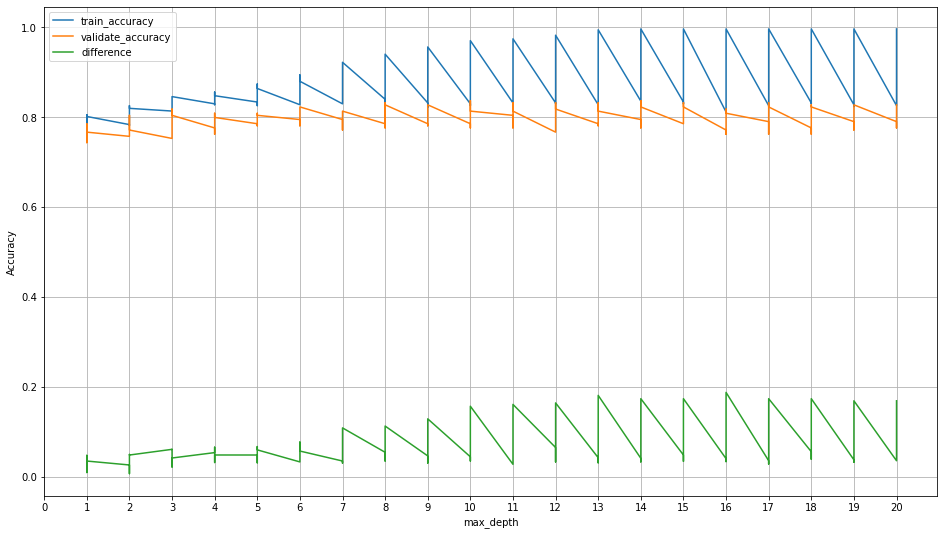

In [64]:
# df.set_index('max_depth').plot

# review ravinder's graph here

df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

### 6. After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [66]:
df[df.difference <= 0.1].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,min_leaves,train_accuracy,validate_accuracy,difference
121,14,2,0.919679,0.836449,0.083230
201,10,2,0.921687,0.836449,0.085238
182,11,3,0.903614,0.831776,0.071839
242,8,3,0.903614,0.831776,0.071839
62,17,3,0.909639,0.831776,0.077863
...,...,...,...,...,...
379,2,20,0.783133,0.757009,0.026123
359,3,20,0.813253,0.752336,0.060917
382,1,3,0.757028,0.747664,0.009365
383,1,4,0.795181,0.747664,0.047517


# KNN EXERCISES

### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [68]:
from sklearn.neighbors import KNeighborsClassifier



In [69]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [70]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [71]:
y_pred = knn.predict(X_train)
y_pred[0:5]

array([0, 1, 0, 1, 1])

In [73]:
y_pred_proba = knn.predict_proba(X_train)
knn.classes_, y_pred_proba[0:10]

(array([0, 1]),
 array([[0.6, 0.4],
        [0.2, 0.8],
        [0.8, 0.2],
        [0.4, 0.6],
        [0.2, 0.8],
        [0.4, 0.6],
        [0.4, 0.6],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ]]))

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [74]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.79


In [77]:
# confusion matrix - actual on left, predicted on top

# 0 = 'perished', 1= 'survived'

print(confusion_matrix(y_train, y_pred))

[[258  49]
 [ 54 137]]


In [78]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       307
           1       0.74      0.72      0.73       191

    accuracy                           0.79       498
   macro avg       0.78      0.78      0.78       498
weighted avg       0.79      0.79      0.79       498



### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [79]:
TP = 258
FP = 54
FN = 49
TN = 137
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7931726907630522
True Positive Rate: 0.8403908794788274
False Positive Rate: 0.28272251308900526
True Negative Rate: 0.7172774869109948
False Negative Rate: 0.15960912052117263
Precision: 0.8269230769230769
Recall: 0.8403908794788274
F1 Score: 0.8336025848142163
Support (0): 307
Support (1): 191


### Run through steps 2-4 setting k to 10

In [80]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [81]:
y_pred = knn.predict(X_train)
y_pred[0:5]

array([1, 1, 0, 0, 1])

In [82]:
y_pred_proba = knn.predict_proba(X_train)
knn.classes_, y_pred_proba[0:10]

(array([0, 1]),
 array([[0.3, 0.7],
        [0.4, 0.6],
        [0.6, 0.4],
        [0.5, 0.5],
        [0.2, 0.8],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.7, 0.3],
        [0.8, 0.2],
        [0.8, 0.2]]))

In [83]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.74


In [84]:
# confusion matrix - actual on left, predicted on top

# 0 = 'perished', 1= 'survived'

print(confusion_matrix(y_train, y_pred))

[[275  32]
 [ 95  96]]


In [85]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       307
           1       0.75      0.50      0.60       191

    accuracy                           0.74       498
   macro avg       0.75      0.70      0.71       498
weighted avg       0.75      0.74      0.73       498



### Run through setps 2-4 setting k to 20

In [86]:
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [87]:
y_pred = knn.predict(X_train)
y_pred[0:5]

array([0, 1, 0, 0, 1])

In [88]:
y_pred_proba = knn.predict_proba(X_train)
knn.classes_, y_pred_proba[0:10]

(array([0, 1]),
 array([[0.55, 0.45],
        [0.4 , 0.6 ],
        [0.7 , 0.3 ],
        [0.6 , 0.4 ],
        [0.3 , 0.7 ],
        [0.55, 0.45],
        [0.6 , 0.4 ],
        [0.7 , 0.3 ],
        [0.45, 0.55],
        [0.6 , 0.4 ]]))

In [89]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.72


In [90]:
# confusion matrix - actual on left, predicted on top

# 0 = 'perished', 1= 'survived'

print(confusion_matrix(y_train, y_pred))

[[269  38]
 [102  89]]


In [91]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.88      0.79       307
           1       0.70      0.47      0.56       191

    accuracy                           0.72       498
   macro avg       0.71      0.67      0.68       498
weighted avg       0.72      0.72      0.70       498



### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- as the number of neighbors goes up, the accuracy goes down.  This must be bc as the neighbors increase,
- the estimated value of the target becomes closer to the mean of the whole set

### Which model performs best on our out-of-sample data from validate?

In [93]:
for i in range(1,21):
    # Make the model
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')#, random_state=123)


    # Fit the model (on train and only train)
    knn.fit(X_validate, y_validate)

    # We'll evaluate the model's performance on train, first
    y_pred = knn.predict(X_validate)


    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_validate, y_pred) #, output_dict=True)
    print(f"KNN with {i} neighbor(s)")
    print(report)
    print()

KNN with 1 neighbor(s)
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       132
           1       0.98      0.99      0.98        82

    accuracy                           0.99       214
   macro avg       0.98      0.99      0.99       214
weighted avg       0.99      0.99      0.99       214


KNN with 2 neighbor(s)
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       132
           1       1.00      0.54      0.70        82

    accuracy                           0.82       214
   macro avg       0.89      0.77      0.79       214
weighted avg       0.86      0.82      0.81       214


KNN with 3 neighbor(s)
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       132
           1       0.78      0.76      0.77        82

    accuracy                           0.83       214
   macro avg       0.82      0.81      0.82       214
wei

In [94]:
# 1 neighbor got us to 99% accuracy.  Is this overfit?